Датасет:
https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset

Описывает бобы разных сортов по размерным характеристикам с изображений.

Информация о наборе данных:
В этом исследовании использовались семь различных типов сухих бобов с учетом таких характеристик, как форма, вид, тип и структура в зависимости от рыночной ситуации. Была разработана система компьютерного зрения для различения семи различных зарегистрированных сортов сухих бобов со схожими характеристиками с целью получения единообразной классификации семян. Для модели классификации были сделаны изображения 13 611 зерен 7 различных зарегистрированных сухих бобов с помощью камеры высокого разрешения. Изображения бобов, полученные с помощью системы компьютерного зрения, были подвергнуты этапам сегментации и извлечения признаков, и в общей сложности из зерен было получено 16 признаков: 12 измерений и 4 формы.


Информация об атрибутах:

1) Площадь (A): Площадь зоны бобов и количество пикселей в ее границах.

2) Периметр (P): Окружность фасоли определяется как длина ее границы.

3) Длина большой оси (L): расстояние между концами самой длинной линии, которую можно провести из фасоли.

4) Длина малой оси (l): самая длинная линия, которую можно провести от фасоли, стоя перпендикулярно главной оси.

5) Соотношение сторон (K): определяет соотношение между L и l.

6) Эксцентриситет (Ec): Эксцентриситет эллипса, имеющего те же моменты, что и область.

7) Выпуклая площадь (C): Количество пикселей в наименьшем выпуклом многоугольнике, который может содержать площадь семени фасоли.

8) Эквивалентный диаметр (Эд): диаметр круга, имеющего такую ​​же площадь, как площадь семени фасоли.

9) Экстент (Ex): отношение пикселей в ограничивающей рамке к площади зерна.

10) Solidity (S): Также известна как выпуклость. Соотношение пикселей в выпуклой оболочке к пикселям, обнаруженным в бобах.

11) Округлость (R): рассчитывается по следующей формуле: (4piA)/(P^2)

12) Компактность (CO): измеряет округлость объекта: Ed/L

13) ShapeFactor1 (SF1)

14) ShapeFactor2 (SF2)

15) ShapeFactor3 (SF3)

16) ShapeFactor4 (SF4)

17) Класс (Секер, Барбунья, Бомбей, Кали, Дермосан, Хороз и Сира)

In [439]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [440]:
dataset = pd.read_csv('Dry_Bean.csv')
dataset = dataset.drop(['Extent', 'Solidity', 'ShapeFactor3', 'ShapeFactor4'], axis=1)
dataset = dataset.drop(dataset[dataset['Class'].isin(['HOROZ', 'CALI', 'SEKER', 'SIRA'])].index, inplace=False)

# Получить длину датасета
num_rows = dataset.shape[0]

print("Длина датасета:", num_rows)

Длина датасета: 5390


In [443]:
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2,Class
2027,41487,815.900,299.046841,177.081490,1.688753,0.805826,42483,229.832306,0.783156,0.768550,0.007208,0.001551,BARBUNYA
2028,41488,759.552,283.142777,186.985489,1.514250,0.750920,42005,229.835076,0.903686,0.811729,0.006825,0.001828,BARBUNYA
2029,42012,809.770,266.700396,202.381088,1.317813,0.651285,43087,231.281949,0.805119,0.867198,0.006348,0.002215,BARBUNYA
2030,43122,838.186,296.404589,185.657600,1.596512,0.779530,44074,234.317382,0.771308,0.790532,0.006874,0.001656,BARBUNYA
2031,43145,799.426,273.402945,201.266886,1.358410,0.676813,43812,234.379863,0.848367,0.857269,0.006337,0.002111,BARBUNYA


In [444]:
vals = dataset["Class"].unique()
vals

array(['BARBUNYA', 'BOMBAY', 'DERMASON'], dtype=object)

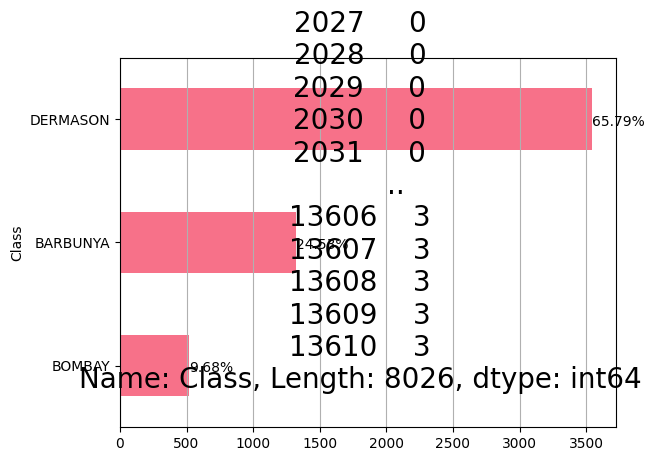

In [445]:
ax = dataset["Class"].value_counts().sort_values().plot(kind="barh")

totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

plt.show()

In [446]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем

cols_for_clusters = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
                     'EquivDiameter', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2']

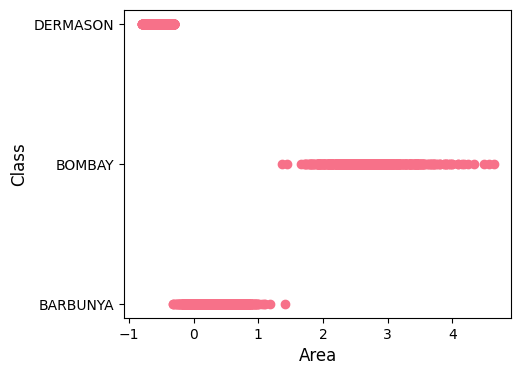

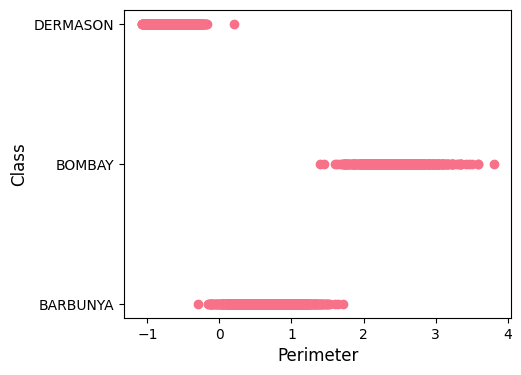

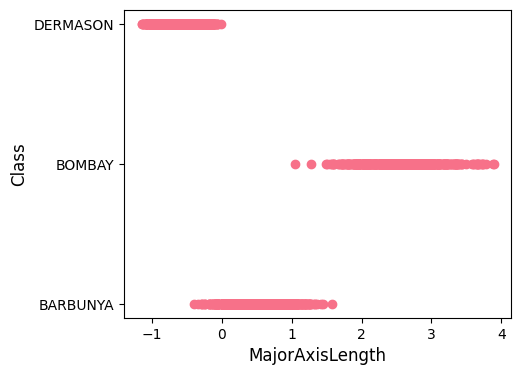

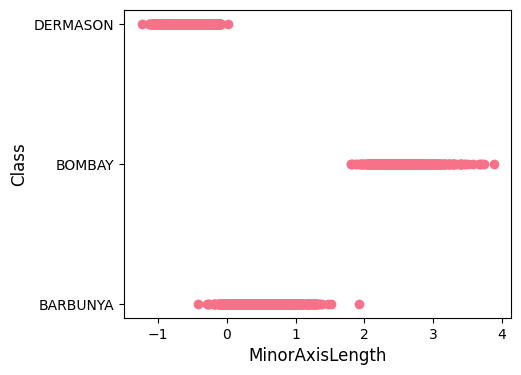

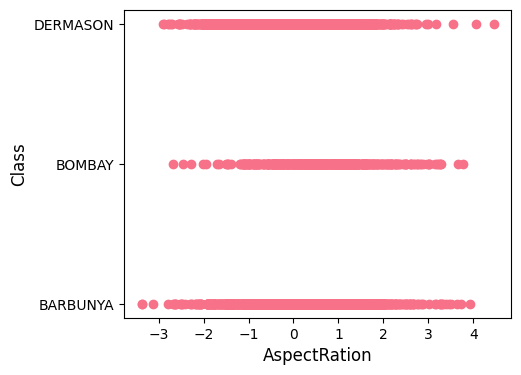

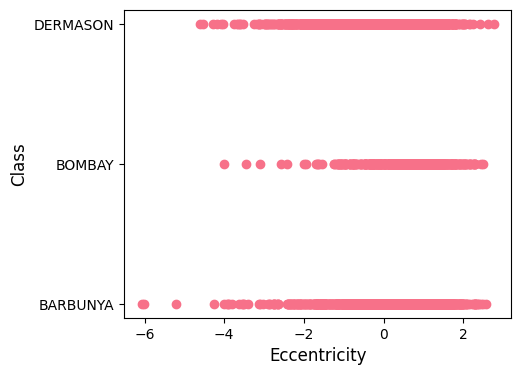

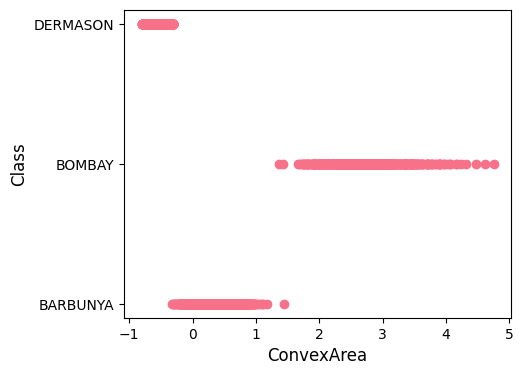

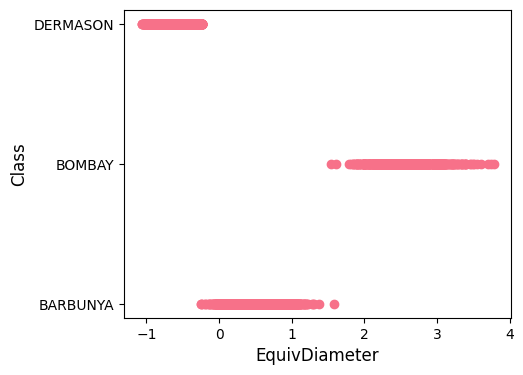

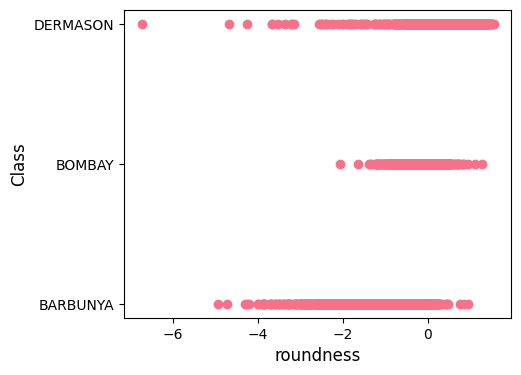

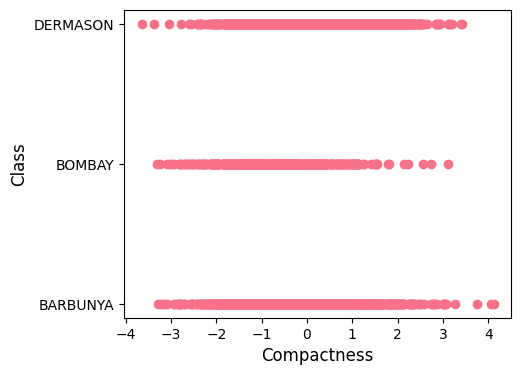

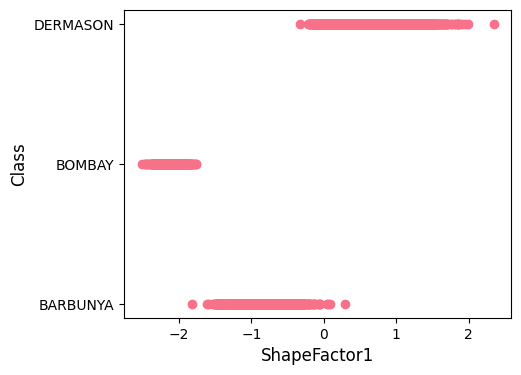

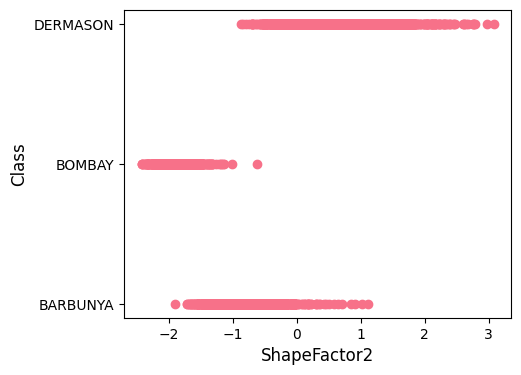

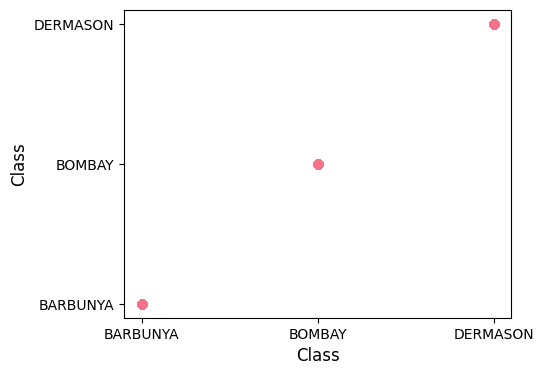

In [447]:
# Нормализовать количественные признаки
scaler = StandardScaler()
dataset[cols_for_clusters] = scaler.fit_transform(dataset[cols_for_clusters])

# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной
for index, feature_name in enumerate(dataset.columns):
    plt.figure(figsize=(5, 4))
    plt.scatter(dataset[feature_name], dataset['Class'])  # Замените 'disease' на имя вашего целевого столбца
    plt.ylabel('Class', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

df = dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных


In [448]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2
2027,-0.315342,-0.106682,-0.103285,-0.410675,1.575772,1.382782,-0.305729,-0.251756,-1.637426,-1.481695,0.291070,-0.557101
2028,-0.315319,-0.295305,-0.247831,-0.260571,0.012055,0.148052,-0.316680,-0.251723,0.456368,-0.045103,0.047886,-0.033192
2029,-0.303138,-0.127202,-0.397269,-0.027239,-1.748217,-2.092575,-0.291891,-0.234532,-1.255893,1.800386,-0.254256,0.700199
2030,-0.277335,-0.032081,-0.127300,-0.280697,0.749204,0.791428,-0.269278,-0.198466,-1.843233,-0.750317,0.078917,-0.358760
2031,-0.276801,-0.161828,-0.336352,-0.044125,-1.384427,-1.518491,-0.275281,-0.197724,-0.504600,1.470055,-0.261457,0.504068


In [449]:
X = df
y = dataset["Class"].replace(vals, [0, 1, 2])
yvals = dataset["Class"]

<ipython-input-449-b2485847100c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["Class"].replace(vals, [0, 1, 2])


In [426]:
y.head()

,Class
2027,0
2028,0
2029,0
2030,0
2031,0


In [450]:
y.unique()

array([0, 1, 2])

### Распространенные алгоритмы кластеризации



In [451]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

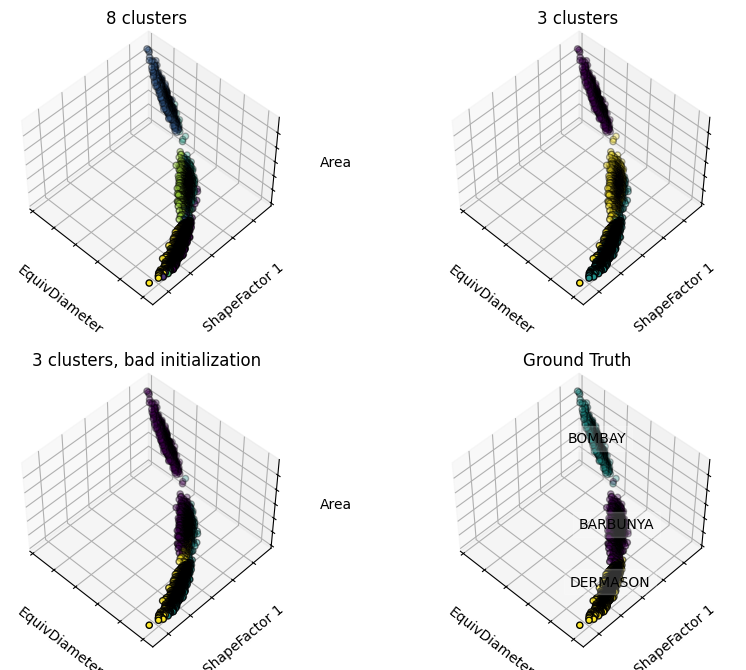

In [452]:
estimators = [
    ("k_means_exes_8", KMeans(n_clusters=8)),
    ("k_means_exes_3", KMeans(n_clusters=3)),
    ("k_means_exes_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["EquivDiameter"], X["ShapeFactor1"], X["Area"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("EquivDiameter")
    ax.set_ylabel("ShapeFactor 1")
    ax.set_zlabel("Area")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = dataset[dataset["Class"]==name]
    ax.text3D(
        ds["EquivDiameter"].mean(),
        ds["ShapeFactor1"].mean(),
        ds["Area"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["EquivDiameter"], X["ShapeFactor1"], X["Area"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("EquivDiameter")
ax.set_ylabel("ShapeFactor 1")
ax.set_zlabel("Area")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [453]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [454]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [455]:
best_metric

[3,
 0.5098076460210749,
 0.9389853314707113,
 array([[-0.52637512, -0.60300135, -0.57621634, -0.56930237, -0.24530463,
         -0.21990714, -0.52774266, -0.57704586,  0.53984368,  0.24525596,
          0.61708996,  0.60348865],
        [ 2.75824327,  2.47395306,  2.57511469,  2.5812765 ,  0.66069586,
          0.60082362,  2.75415205,  2.59315105, -0.22786339, -0.69137127,
         -2.09785104, -1.90097444],
        [ 0.33426538,  0.65474331,  0.54201075,  0.52081865,  0.40337806,
          0.3582327 ,  0.33959552,  0.53711177, -1.37368511, -0.39108814,
         -0.8420149 , -0.88315998]])]

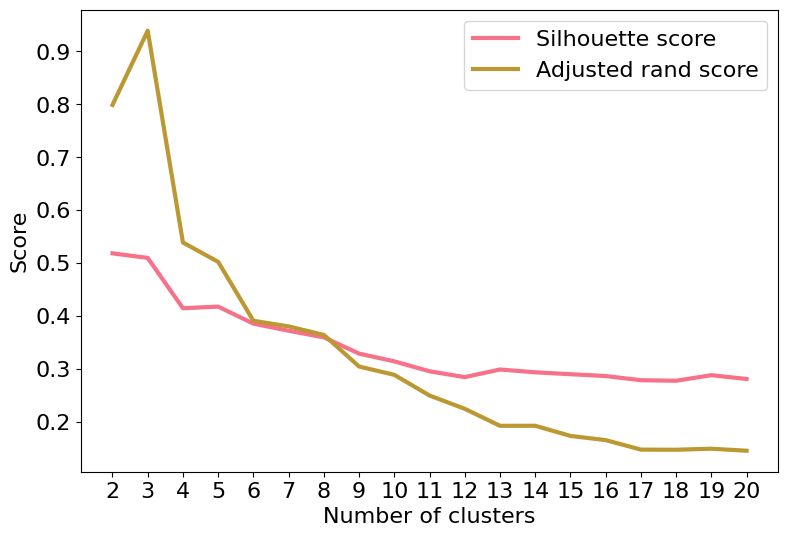

In [456]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [457]:
from scipy.cluster.hierarchy import linkage, dendrogram

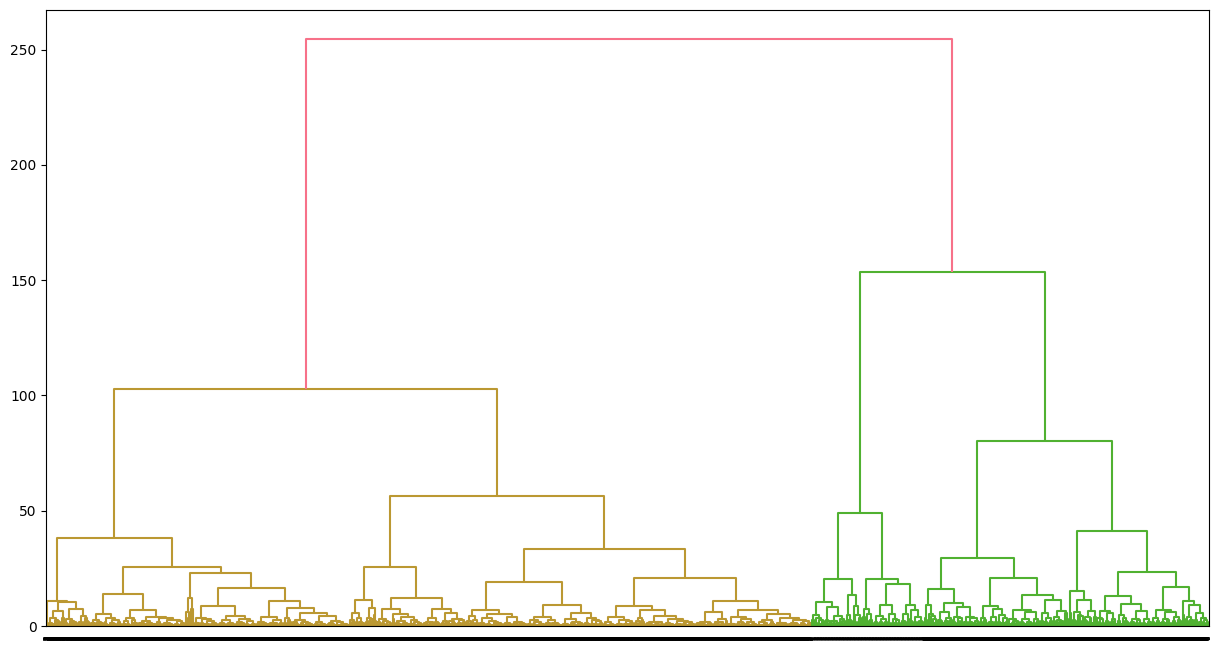

In [458]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [459]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [460]:
mins = X.shape[1]

['y', 'b', 'g', 'r', 'm', 'c', 'w']


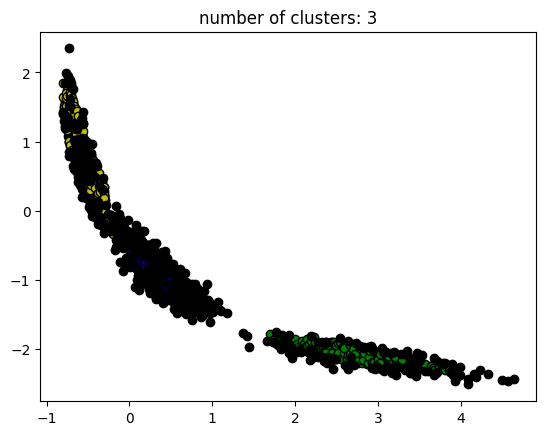

In [494]:
db = DBSCAN(eps=0.53, min_samples=mins).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'm', 'c', 'w']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Area"], xy["ShapeFactor1"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Area"], xy["ShapeFactor1"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

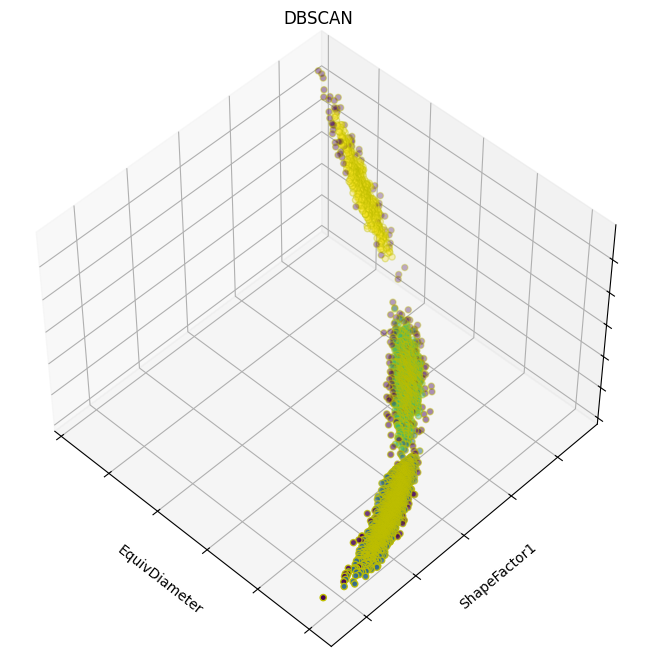

In [492]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["EquivDiameter"], X["ShapeFactor1"], X["Area"], c=labels.astype(float), edgecolor="y")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("EquivDiameter")
ax.set_ylabel("ShapeFactor1")
ax.set_zlabel("Area")
ax.set_title("DBSCAN")

plt.show()

In [493]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.48
Adjusted Rand Index: 0.93
